## Import Library

In [63]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

## import and visualization dataset

In [41]:
data = pd.read_csv('Data/cars.csv')

In [42]:
data.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [ ]:
X = np.array(data['Volume']).reshape(-1, 1)
Y = np.array(data['CO2'])

Text(0.5, 1.0, 'Biểu đồ thể hiện mối quan hệ giữa Volume và CO2')

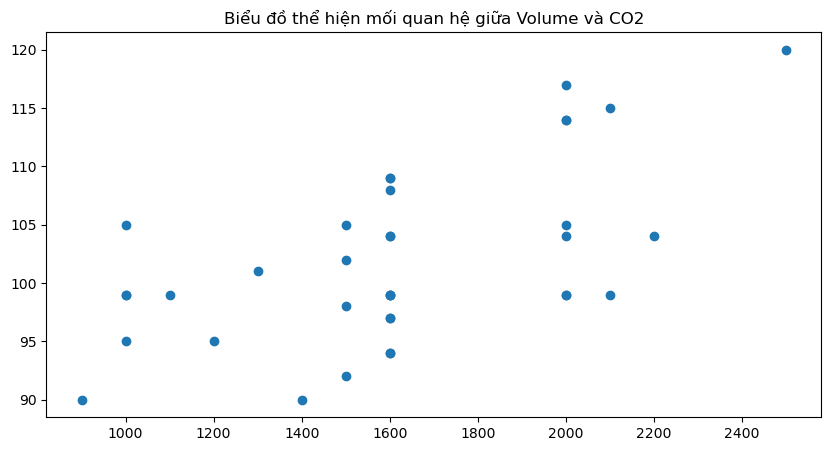

In [45]:
plt.figure(figsize=(10, 5))
plt.scatter(X, Y)
plt.title('Biểu đồ thể hiện mối quan hệ giữa Volume và CO2')

## Using linear regression to training model

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Result

In [49]:
print(f'Hệ số: {model.coef_}')
print(f'intercept: {model.intercept_}')

Hệ số: [0.00854922]
intercept: 87.73834196891191


In [50]:
# Dự đoán
Y_pred = model.predict(X_test)

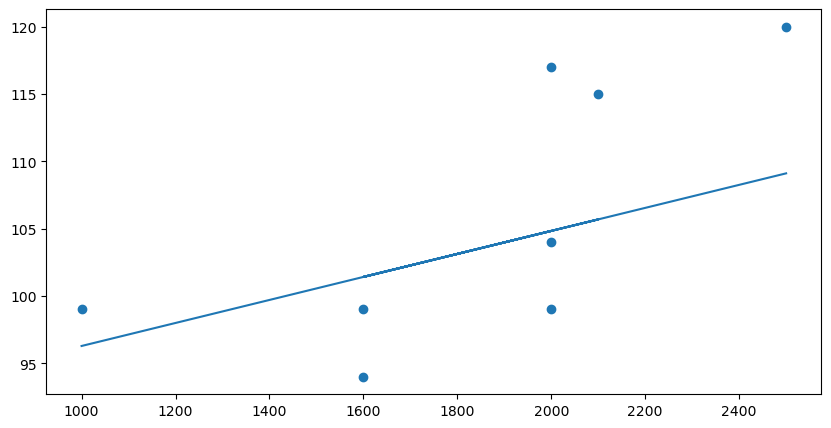

In [51]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()

In [52]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [53]:
print(f'MAE : {mae}')
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')
print(f'r2 score : {r2}')

MAE : 6.447538860103624
MSE : 57.01636956696819
RMSE : 7.550918458503455
r2 score : 0.34168362758687276


## Advanced

In [ ]:
X = data[['Volume', 'Weight']]
Y = data['CO2']

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
model.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [73]:
print(f'Hệ số: {model.coef_}')
print(f'intercept: {model.intercept_}')

Hệ số: [0.00428741 0.00804928]
intercept: 84.2150200669528


In [74]:
# Dự đoán
# Y_pred = model.predict(X_test)

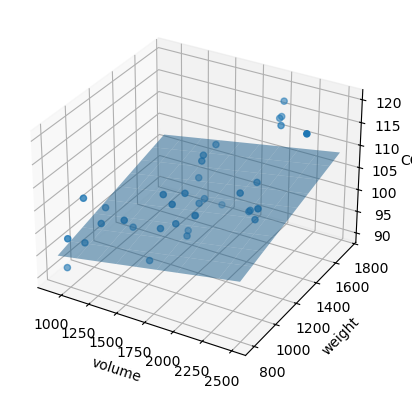

In [77]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data['Volume'], data['Weight'], data['CO2'])

# mặt phẳng hồi quy 
volume, weight = np.meshgrid(
    np.linspace(data['Volume'].min(), data['Volume'].max(), 10),
    np.linspace(data['Weight'].min(), data['Weight'].max(), 10)
)

x_grid = pd.DataFrame({
    "Volume" : volume.ravel(),
    "Weight" : weight.ravel()
})

Y_pred = model.predict(x_grid).reshape(volume.shape)

ax.plot_surface(volume, weight, Y_pred, alpha = 0.5)

ax.set_xlabel('volume')
ax.set_ylabel('weight')
ax.set_zlabel('CO2')

plt.show()